<a href="https://colab.research.google.com/github/KDaryaA/iris/blob/main/ml_project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Описание набора данных, Постановка задачи, Описание выбранного классификатора

Этот проект представляет собой применение машинного обучения с программированием на Python на примере классификации цветов IRIS с использованием библиотеки scikit-learn.

Здесь используются алгоритмы, которые представляют собой некоторые типы машинного обучения с учителем. Мы сравним три классификатора: дерево решений, метод k-ближайших соседей и логистическую регрессию.

## Набор данных

[Ирисы Фишера](https://ru.wikipedia.org/wiki/Ирисы_Фишера) — набор данных для задачи классификации, на примере которого Рональд Фишер в 1936 году продемонстрировал работу разработанного им метода дискриминантного анализа. Иногда его также называют ирисами Андерсона, так как данные были собраны американским ботаником Эдгаром Андерсоном.

Этот набор данных стал классическим и часто используется в литературе для иллюстрации работы различных статистических и машинных алгоритмов.

Набор данных содержит 150 экземпляров ирисов, по 50 экземпляров из трёх видов:

- Iris setosa
- Iris versicolor
- Iris virginica

Для каждого экземпляра измерялись четыре характеристики (в сантиметрах):

- Длина чашелистика (sepal length)
- Ширина чашелистика (sepal width)
- Длина лепестка (petal length)
- Ширина лепестка (petal width)

## Постановка задачи

На основании этого набора данных требуется построить модель, определяющую вид растения по четырём признакам. Это задача многоклассовой классификации, поскольку имеется три класса.

## Описание классификаторов

1. **Дерево решений** — метод, представляющий собой древовидную структуру, где в узлах находятся условия по признакам, а листья представляют классы.
2. **Метод k-ближайших соседей (KNN)** — алгоритм, который определяет класс объекта по классам его ближайших соседей.
3. **Логистическая регрессия** — статистическая модель, применяемая для задач классификации, основанная на вероятностях.

**Цель проекта** — обучить все три модели, сравнить их точность и выбрать наилучшую.

## 2. Подключение библиотек и чтение данных

In [38]:
# Подключаем библиотеки
import pandas as pd            # Работа с данными
import numpy as np             # Математические операции
import matplotlib.pyplot as plt  # Графики
import seaborn as sns          # Визуализация данных

# Отключаем предупреждения
import warnings
warnings.filterwarnings("ignore")

# Разделение выборки
from sklearn.model_selection import train_test_split

# Классификаторы
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Метрики оценки
from sklearn import metrics

# Загрузка данных
url = 'https://raw.githubusercontent.com/yakushinav/journ_prg/main/iris.csv'
df = pd.read_csv(url)

# Просмотр первых строк
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## 3. Характеристики набора данных и визуализация

In [39]:
df.info() # Типы данных и структура

df.describe() # Статистика по числовым признакам

df['species'].value_counts() # Количество объектов в каждом классе

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,count
species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


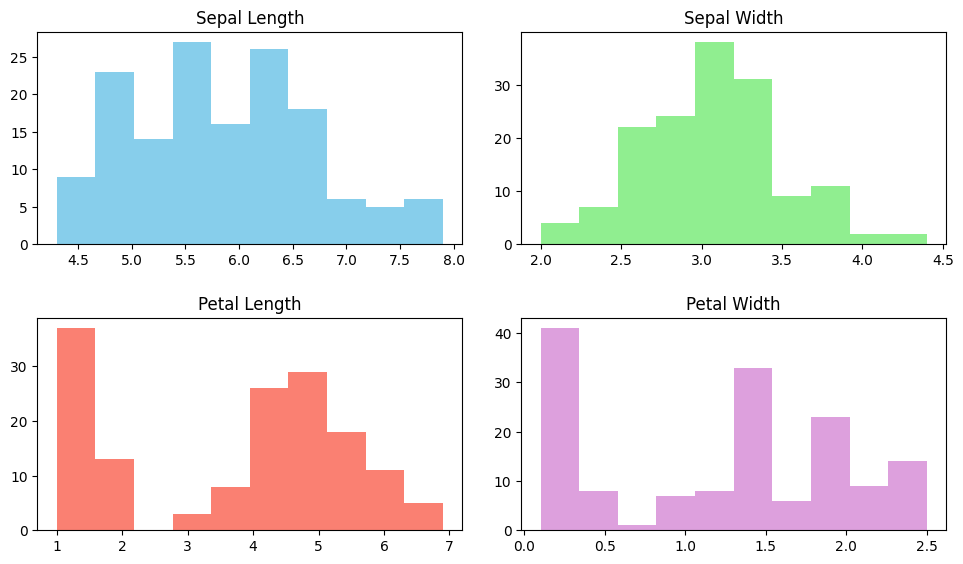

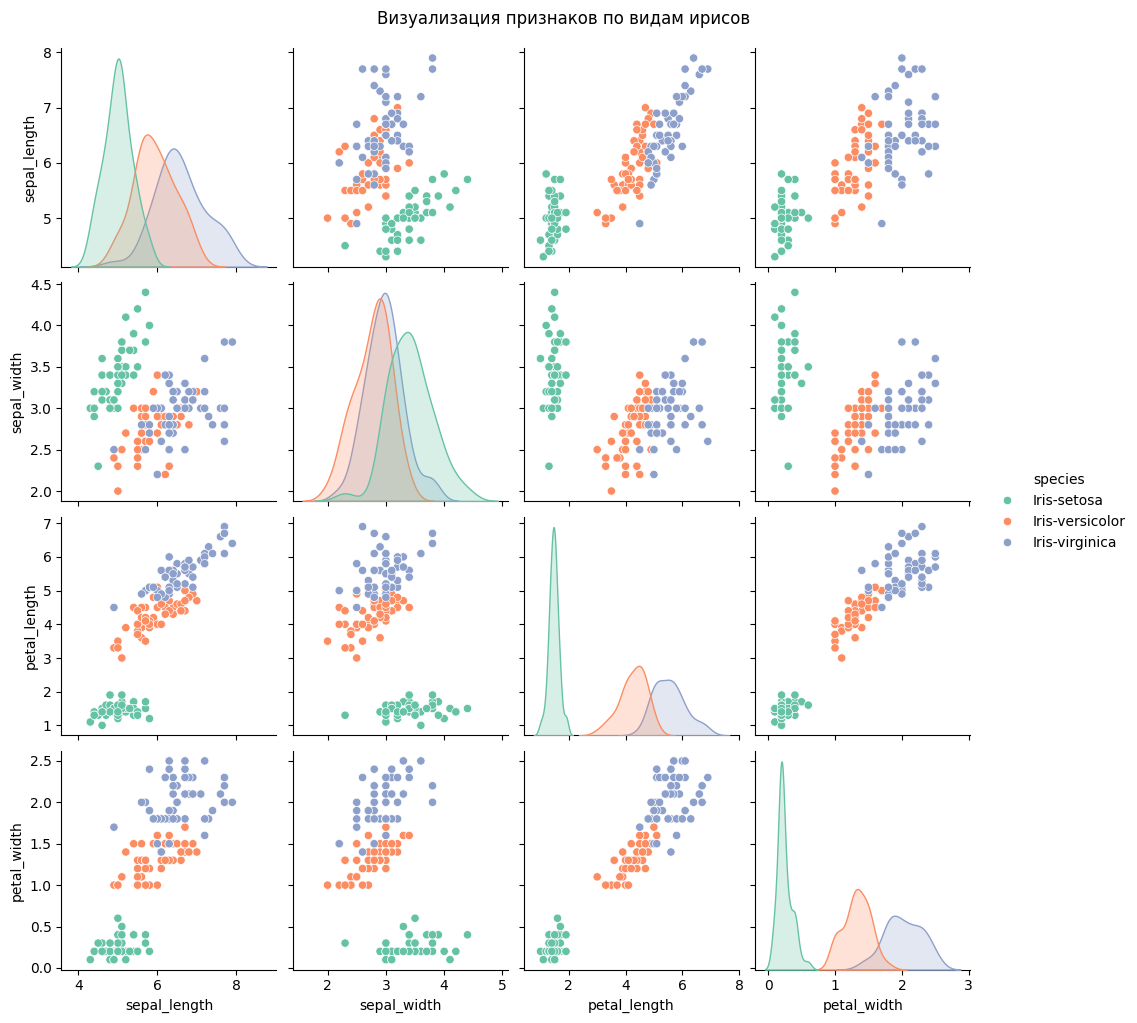

In [40]:
# Гистограммы по каждому признаку
n_bins = 10
fig, axs = plt.subplots(2, 2, figsize=(10, 6))
axs[0,0].hist(df['sepal_length'], bins=n_bins, color='skyblue')
axs[0,0].set_title('Sepal Length')

axs[0,1].hist(df['sepal_width'], bins=n_bins, color='lightgreen')
axs[0,1].set_title('Sepal Width')

axs[1,0].hist(df['petal_length'], bins=n_bins, color='salmon')
axs[1,0].set_title('Petal Length')

axs[1,1].hist(df['petal_width'], bins=n_bins, color='plum')
axs[1,1].set_title('Petal Width')

fig.tight_layout(pad=2.0)
plt.show()

# Попарные графики с использованием seaborn
sns.pairplot(df, hue='species', palette='Set2')
plt.suptitle("Визуализация признаков по видам ирисов", y=1.02)
plt.show()

## 4. Разделение выборки

In [41]:
# Разделим выборку на обучающую и тестовую
train, test = train_test_split(df, test_size=0.4, stratify=df['species'], random_state=42)

# Стратификация обеспечивает равное распределение классов в обучающей и тестовой выборке
# random_state нужен для воспроизводимости результата

# Выделим признаки и целевую переменную в каждой части
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

X_train = train[features]
y_train = train['species']

X_test = test[features]
y_test = test['species']

## 5. Создание модели машинного обучения

In [42]:
# 1. Дерево решений
model_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
model_tree.fit(X_train, y_train)

# 2. Метод k-ближайших соседей (k=5)
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train, y_train)

# 3. Логистическая регрессия
model_lr = LogisticRegression(max_iter=200, random_state=42)
model_lr.fit(X_train, y_train)


LogisticRegression(max_iter=200, random_state=42)

## 6. Оценка качества моделей машинного обучения

In [43]:
# Предсказания моделей
y_pred_tree = model_tree.predict(X_test)
y_pred_knn = model_knn.predict(X_test)
y_pred_lr = model_lr.predict(X_test)

# Accuracy (точность классификации)
acc_tree = metrics.accuracy_score(y_test, y_pred_tree)
acc_knn = metrics.accuracy_score(y_test, y_pred_knn)
acc_lr = metrics.accuracy_score(y_test, y_pred_lr)

print(f"Точность дерева решений:       {acc_tree:.3f}")
print(f"Точность KNN (k=5):            {acc_knn:.3f}")
print(f"Точность логистической регрессии: {acc_lr:.3f}")

# Матрицы ошибок
print("\n Матрица ошибок - Decision Tree")
print(metrics.confusion_matrix(y_test, y_pred_tree))

print("\n Матрица ошибок - KNN")
print(metrics.confusion_matrix(y_test, y_pred_knn))

print("\n Матрица ошибок - Logistic Regression")
print(metrics.confusion_matrix(y_test, y_pred_lr))


Точность дерева решений:       0.983
Точность KNN (k=5):            0.933
Точность логистической регрессии: 0.950

 Матрица ошибок - Decision Tree
[[20  0  0]
 [ 0 19  1]
 [ 0  0 20]]

 Матрица ошибок - KNN
[[20  0  0]
 [ 0 20  0]
 [ 0  4 16]]

 Матрица ошибок - Logistic Regression
[[20  0  0]
 [ 0 19  1]
 [ 0  2 18]]


 ## 7. Применение построенной модели машинного обучения

In [44]:
# Пример 1
sample1 = pd.DataFrame({'sepal_length': [4.9], 'sepal_width': [3.6],
                        'petal_length': [1.8], 'petal_width': [0.7]})
pred1 = model_lr.predict(sample1)
print(f" Пример 1: {pred1[0]}")

# Пример 2
sample2 = pd.DataFrame({'sepal_length': [6.0], 'sepal_width': [2.9],
                        'petal_length': [4.5], 'petal_width': [1.5]})
pred2 = model_lr.predict(sample2)
print(f" Пример 2: {pred2[0]}")

# Пример 3
sample3 = pd.DataFrame({'sepal_length': [6.8], 'sepal_width': [3.0],
                        'petal_length': [5.5], 'petal_width': [2.1]})
pred3 = model_lr.predict(sample3)
print(f" Пример 3: {pred3[0]}")


 Пример 1: Iris-setosa
 Пример 2: Iris-versicolor
 Пример 3: Iris-virginica


## 8. Вывод и выбор лучшей модели

В проекте были обучены три классификатора: дерево решений, метод k-ближайших соседей и логистическая регрессия.

**Результаты оценки точности на тестовой выборке:**

- Decision Tree: **0.983**
- KNN: **0.933**
- Logistic Regression: **0.950**

Модель **дерева решений** показала наилучший результат и была выбрана для финального применения к новым данным.
